![example](images/director_shot.jpeg)

# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Here you run your code to explore the data

imdb_title = pd.read_csv('./data/zippedData/imdb.title.basics.csv.gz')
imdb_title_akas = pd.read_csv('./data/zippedData/imdb.title.akas.csv.gz')
imdb_ratings = pd.read_csv('./data/zippedData/imdb.title.ratings.csv.gz')
bom_gross = pd.read_csv('./data/zippedData/bom.movie_gross.csv.gz')

bom_gross_raw = pd.read_csv('./data/zippedData/bom.movie_gross.csv.gz')


In [3]:
imdb_title.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


**OBSERVATION:** We can notice from here that only the columns runtime_minutes and genres have null values

In [4]:
imdb_title_akas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


**OBSERVATION:** We can notice from here that few columns have null values

In [5]:
imdb_ratings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


**OBSERVATION:** We can notice from here that all columns have values

In [6]:
bom_gross.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


**OBSERVATION:** We can notice from here that all columns except title have null values

**IMDB TITLES DATA**

In [7]:
imdb_title.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [8]:
imdb_title['tconst'].value_counts()

tt2536298    1
tt4519746    1
tt6992060    1
tt8458784    1
tt5777628    1
            ..
tt5194048    1
tt3407562    1
tt8559640    1
tt5068090    1
tt2711634    1
Name: tconst, Length: 146144, dtype: int64

**OBSERVATION:** each tconst have a unique value. From IMDB webstie it says: alphanumer unique identifier of the title. As such, we will use tconst to merge title_basics and ratins

In [9]:
imdb_title['primary_title'].value_counts()


Home                               24
The Return                         20
Broken                             20
Homecoming                         16
Alone                              16
                                   ..
Lisbon Revisited                    1
78/52: Hitchcock's Shower Scene     1
Sweet Old World                     1
Its not about the cycle             1
Siruthai                            1
Name: primary_title, Length: 136071, dtype: int64

**Note to me:** Primary title: the more popular title / the title used by the filmmakers on promotional materials at the point of release

In [10]:
imdb_title['original_title'].value_counts()


Broken                  19
Home                    18
The Return              17
The Gift                13
Homecoming              13
                        ..
Black Hills              1
Yorgos                   1
Maria and Her Shadow     1
Echt Herman Koch         1
Siruthai                 1
Name: original_title, Length: 137773, dtype: int64

In [11]:
imdb_title['start_year'].value_counts()


2017    17504
2016    17272
2018    16849
2015    16243
2014    15589
2013    14709
2012    13787
2011    12900
2010    11849
2019     8379
2020      937
2021       83
2022       32
2023        5
2024        2
2027        1
2026        1
2025        1
2115        1
Name: start_year, dtype: int64

**OBSERVATION:** How is it possible that the start year are beyon actual year? eg 2115

In [12]:
imdb_title['runtime_minutes'].value_counts()


90.0     7131
80.0     3526
85.0     2915
100.0    2662
95.0     2549
         ... 
382.0       1
724.0       1
808.0       1
287.0       1
540.0       1
Name: runtime_minutes, Length: 367, dtype: int64

**Note to me** is this information necessary for my project? well indeed it owuld be good to know whether movies should be long or short...

In [13]:
imdb_title['genres'].value_counts()


Documentary                      32185
Drama                            21486
Comedy                            9177
Horror                            4372
Comedy,Drama                      3519
                                 ...  
Music,Sport                          1
Family,Horror                        1
Animation,Fantasy,Thriller           1
Animation,Documentary,Mystery        1
Adventure,History,Western            1
Name: genres, Length: 1085, dtype: int64

**IMDB RATINGS DATA**

In [14]:
imdb_ratings.head()


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [15]:
imdb_ratings['tconst'].value_counts()

tt2536298    1
tt8983300    1
tt3887756    1
tt5529600    1
tt5170394    1
            ..
tt9399564    1
tt2184956    1
tt3907858    1
tt6571274    1
tt2711634    1
Name: tconst, Length: 73856, dtype: int64

In [16]:
imdb_ratings['averagerating'].value_counts()

7.0     2262
6.6     2251
7.2     2249
6.8     2239
6.5     2221
        ... 
9.6       18
10.0      16
9.8       15
9.7       12
9.9        5
Name: averagerating, Length: 91, dtype: int64

In [17]:
imdb_ratings['numvotes'].value_counts()

6        2875
5        2699
7        2476
8        2167
9        1929
         ... 
18286       1
16289       1
1958        1
4007        1
4098        1
Name: numvotes, Length: 7349, dtype: int64

THINGS TO CONSIDER:
- each title id has several rows, with different region, languages... 
- there are different titles for the same movie, maybe when combining with other database I have to select the original title

In [18]:
imb_titles['title_id'].value_counts()


NameError: name 'imb_titles' is not defined

In [ ]:
imb_titles['ordering'].value_counts()


**note for me** = what is ordering?


In [ ]:
imb_titles['title'].value_counts()


In [ ]:
imb_titles['region'].value_counts()


In [ ]:
imb_titles['language'].value_counts()


In [ ]:
imb_titles['types'].value_counts()


**note for me** do we need all these types? Alternative?? 

In [ ]:
imb_titles['attributes'].value_counts()


In [ ]:
imb_titles['is_original_title'].value_counts()


this is indicating that htere are 44700 original titles

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# Here you run your code to clean the data

**DATA CLEANING**
in imbd title basics and ratins all the columns follow the same format, lowercase and "_" between words

do I need to drop columns? At the moment I will keep it, as I may draw more conclusions with more data

In [19]:
# Merge imdb_title and imdb_ratins on animal id and year
imdb_title_rating  = pd.merge(imdb_title, 
                              imdb_ratings, 
                              on=['tconst'], 
                              how='left') 
#I choose left and this order because imdb_title has more raws, and up to date, I want to maintain all the info.

In [20]:
imdb_title_rating.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [21]:
imdb_title_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
 6   averagerating    73856 non-null   float64
 7   numvotes         73856 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 10.0+ MB


In [22]:
#we want to delet the columns that have no averagerating
imdb_title_rating.dropna(subset = ['averagerating'], inplace=True)

we can notince that hte num of votes of those ones who averageratin is 10 is very low. In the IMDB website, they mentioned m = minimum votes required to be listed in the Top Rated 250 list (currently 25,000)

More info in this link: https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV#

In [23]:
#we want to delete the columns with less than 25000 votes
imdb_title_rating.drop(imdb_title_rating[imdb_title_rating['numvotes'] < 25000].index, inplace=True)





In [24]:
imdb_title_rating.sort_values('averagerating').tail()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
107713,tt6316138,Ayla: The Daughter of War,Ayla: The Daughter of War,2017,125.0,"Drama,History,War",8.7,26743.0
7066,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0
72821,tt4154796,Avengers: Endgame,Avengers: Endgame,2019,181.0,"Action,Adventure,Sci-Fi",8.8,441135.0
43533,tt2592910,CM101MMXI Fundamentals,CM101MMXI Fundamentals,2013,139.0,"Comedy,Documentary",9.2,41560.0
99483,tt5813916,The Mountain II,Dag II,2016,135.0,"Action,Drama,War",9.3,100568.0


We can select from the past 5 years

In [25]:
imdb_top25 = imdb_title_rating[imdb_title_rating['start_year'] >= 2015].sort_values('averagerating').tail(25)

In [26]:
imdb_top25

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
70269,tt4016934,The Handmaiden,Ah-ga-ssi,2016,145.0,"Drama,Romance,Thriller",8.1,79272.0
76697,tt4387040,Airlift,Airlift,2016,130.0,"Drama,History",8.1,48323.0
29109,tt2119532,Hacksaw Ridge,Hacksaw Ridge,2016,139.0,"Biography,Drama,History",8.1,366904.0
21849,tt1895587,Spotlight,Spotlight,2015,129.0,"Crime,Drama",8.1,365110.0
56763,tt3315342,Logan,Logan,2017,137.0,"Action,Drama,Sci-Fi",8.1,560270.0
7213,tt1392190,Mad Max: Fury Road,Mad Max: Fury Road,2015,120.0,"Action,Adventure,Sci-Fi",8.1,780910.0
127087,tt7775622,Free Solo,Free Solo,2018,100.0,"Documentary,Sport",8.2,32250.0
85228,tt4934950,Talvar,Talvar,2015,132.0,"Crime,Drama,Mystery",8.2,25443.0
53866,tt3170832,Room,Room,2015,118.0,"Drama,Thriller",8.2,316791.0
86657,tt5027774,"Three Billboards Outside Ebbing, Missouri","Three Billboards Outside Ebbing, Missouri",2017,115.0,"Crime,Drama",8.2,344047.0


can we from here gain some insights? For example, whatare the most common genres? leng of movie?  We could do a box plot of running times, and also genres we have to cut after each comma. What is the most common genre? can we merge all of them and group by genre and then pick the top 3?



<AxesSubplot:ylabel='Frequency'>

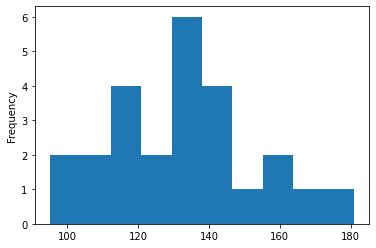

In [27]:
imdb_top25['runtime_minutes'].plot.hist()

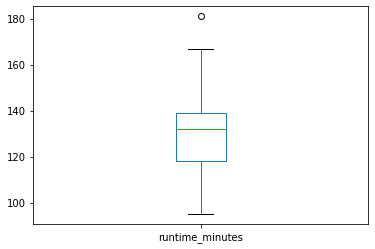

In [28]:
imdb_top25['runtime_minutes'].plot.box();

In [29]:
imdb_top25['runtime_minutes'].mean()

132.48

can we create a list with the different genres?

In [30]:
genres = imdb_top25['genres'].map(lambda x: x.split(','))

In [31]:
type(genres)


pandas.core.series.Series

In [32]:
col_one_list = imdb_top25['genres'].tolist()

sent_str = ""
for x in col_one_list:
    sent_str += str(x) + ","

sent_str = sent_str.split(',')
sent_str

['Drama',
 'Romance',
 'Thriller',
 'Drama',
 'History',
 'Biography',
 'Drama',
 'History',
 'Crime',
 'Drama',
 'Action',
 'Drama',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Documentary',
 'Sport',
 'Crime',
 'Drama',
 'Mystery',
 'Drama',
 'Thriller',
 'Crime',
 'Drama',
 'Drama',
 'Thriller',
 'Adventure',
 'Animation',
 'Comedy',
 'Biography',
 'Comedy',
 'Drama',
 'Crime',
 'Drama',
 'Mystery',
 'Action',
 'Drama',
 'Adventure',
 'Animation',
 'Comedy',
 'Animation',
 'Drama',
 'Fantasy',
 'Action',
 'Biography',
 'Drama',
 'Action',
 'Adventure',
 'Animation',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Crime',
 'Thriller',
 'Action',
 'Drama',
 'War',
 'Drama',
 'History',
 'War',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Drama',
 'War',
 '']

In [33]:
wordfreq = []
for w in sent_str:
    wordfreq.append(sent_str.count(w))

wordfreq


[17,
 1,
 4,
 17,
 3,
 3,
 17,
 3,
 5,
 17,
 9,
 17,
 4,
 9,
 6,
 4,
 1,
 1,
 5,
 17,
 2,
 17,
 4,
 5,
 17,
 17,
 4,
 6,
 4,
 3,
 3,
 3,
 17,
 5,
 17,
 2,
 9,
 17,
 6,
 4,
 3,
 4,
 17,
 1,
 9,
 3,
 17,
 9,
 6,
 4,
 9,
 6,
 4,
 5,
 4,
 9,
 17,
 3,
 17,
 3,
 3,
 9,
 6,
 4,
 9,
 17,
 3,
 1]

In [34]:
from collections import Counter


In [35]:
counts = Counter(sent_str).most_common()
print(counts)
type(counts)

[('Drama', 17), ('Action', 9), ('Adventure', 6), ('Crime', 5), ('Thriller', 4), ('Sci-Fi', 4), ('Animation', 4), ('History', 3), ('Biography', 3), ('Comedy', 3), ('War', 3), ('Mystery', 2), ('Romance', 1), ('Documentary', 1), ('Sport', 1), ('Fantasy', 1), ('', 1)]


list

In [36]:
names = []
for x in counts:
    names.append(x[0])
names

values = []
for x in counts:
    values.append(x[1])
values

[17, 9, 6, 5, 4, 4, 4, 3, 3, 3, 3, 2, 1, 1, 1, 1, 1]

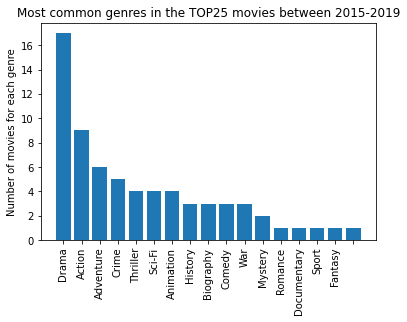

In [86]:
fig, ax = plt.subplots()
plt.bar(range(len(counts)), values, tick_label=names)
plt.xticks(rotation=90)
ax.set_ylabel('Number of movies for each genre')
ax.set_title('Most common genres in the TOP25 movies between 2015-2019')
plt.show()

In [38]:
counts[1][1]

9

**Now I want to repeat the same for 2021 and do an study from each region**

I want to see how drama change over the years. So I need to create a new dictionary that adds the value of drama for each year

In [39]:
def Convert(lst):
    res_dct = {lst[i][0]: lst[i][1] for i in range(0, len(lst), 2)}
    return res_dct
         

In [40]:
counts_dict=(Convert(counts))


In [41]:
counts_dict


{'Drama': 17,
 'Adventure': 6,
 'Thriller': 4,
 'Animation': 4,
 'Biography': 3,
 'War': 3,
 'Romance': 1,
 'Sport': 1,
 '': 1}

In [42]:
type(counts_dict)

dict

In [43]:
print(counts_dict.get('Drama'))

17


In [44]:
imdb_top25_2017 = imdb_title_rating[imdb_title_rating['start_year'] == 2017].sort_values('averagerating').tail(25)
imdb_top25_2018 = imdb_title_rating[imdb_title_rating['start_year'] == 2018].sort_values('averagerating').tail(25)
imdb_top25_2019 = imdb_title_rating[imdb_title_rating['start_year'] == 2019].sort_values('averagerating').tail(25)
imdb_top25_2016 = imdb_title_rating[imdb_title_rating['start_year'] == 2016].sort_values('averagerating').tail(25)
imdb_top25_2015 = imdb_title_rating[imdb_title_rating['start_year'] == 2015].sort_values('averagerating').tail(25)

In [45]:
genres_2017 = imdb_top25_2017['genres'].map(lambda x: x.split(','))
genres_2018 = imdb_top25_2018['genres'].map(lambda x: x.split(','))
genres_2019 = imdb_top25_2019['genres'].map(lambda x: x.split(','))
genres_2016 = imdb_top25_2016['genres'].map(lambda x: x.split(','))
genres_2015 = imdb_top25_2015['genres'].map(lambda x: x.split(','))

In [46]:
col_one_list_2017 = imdb_top25_2017['genres'].tolist()
col_one_list_2018 = imdb_top25_2018['genres'].tolist()
col_one_list_2019 = imdb_top25_2019['genres'].tolist()
col_one_list_2016 = imdb_top25_2016['genres'].tolist()
col_one_list_2015 = imdb_top25_2015['genres'].tolist()



In [47]:
col_one_list_2015

['Drama,History,Thriller',
 'Drama',
 'Crime,Drama,Romance',
 'Comedy,Drama,Romance',
 'Adventure,Animation,Drama',
 'Drama,History,War',
 'Biography,Documentary,Music',
 'Comedy,Drama,Romance',
 'Drama,War',
 'Biography,Comedy,Drama',
 'Crime,Drama,Mystery',
 'Biography,Drama,History',
 'Action,Adventure,Fantasy',
 'Adventure,Drama,Sci-Fi',
 'Action,Adventure,Biography',
 'Documentary',
 'Action,Thriller',
 'Action,Comedy,Drama',
 'Action,Adventure,Sci-Fi',
 'Crime,Drama',
 'Action,Drama',
 'Adventure,Animation,Comedy',
 'Drama,Thriller',
 'Crime,Drama,Mystery',
 'Crime,Drama,Mystery']

In [48]:
col_one_list_2020

NameError: name 'col_one_list_2020' is not defined

In [49]:
sent_str_2015 = ""
for x in col_one_list_2015:
    sent_str_2015 += str(x) + ","

sent_str_2015 = sent_str_2015.split(',')

In [50]:
sent_str_2016 = ""
for x in col_one_list_2016:
    sent_str_2016 += str(x) + ","

sent_str_2016 = sent_str_2016.split(',')

In [51]:
sent_str_2017 = ""
for x in col_one_list_2017:
    sent_str_2017 += str(x) + ","

sent_str_2017 = sent_str_2017.split(',')

In [52]:
sent_str_2018 = ""
for x in col_one_list_2018:
    sent_str_2018 += str(x) + ","

sent_str_2018 = sent_str_2018.split(',')

In [53]:
sent_str_2019 = ""
for x in col_one_list_2019:
    sent_str_2019 += str(x) + ","

sent_str_2019 = sent_str_2019.split(',')

In [54]:
counts_2015 = Counter(sent_str_2015).most_common()
print(counts_2015)


[('Drama', 18), ('Adventure', 6), ('Action', 6), ('Crime', 5), ('Comedy', 5), ('Biography', 4), ('History', 3), ('Thriller', 3), ('Romance', 3), ('Mystery', 3), ('Animation', 2), ('War', 2), ('Documentary', 2), ('Sci-Fi', 2), ('Music', 1), ('Fantasy', 1), ('', 1)]


In [55]:
counts_2016 = Counter(sent_str_2016).most_common()
print(counts_2016)


[('Drama', 19), ('Comedy', 7), ('Action', 6), ('Adventure', 6), ('Biography', 5), ('Thriller', 4), ('Sci-Fi', 3), ('Animation', 3), ('History', 3), ('Mystery', 2), ('Music', 2), ('Sport', 1), ('Romance', 1), ('Crime', 1), ('Fantasy', 1), ('War', 1), ('', 1)]


In [56]:
counts_2017 = Counter(sent_str_2017).most_common()
print(counts_2017)


[('Drama', 17), ('Action', 9), ('Crime', 6), ('Adventure', 5), ('Comedy', 5), ('Biography', 4), ('Thriller', 3), ('Mystery', 3), ('Romance', 2), ('Animation', 2), ('Family', 2), ('History', 2), ('Sci-Fi', 2), ('Musical', 1), ('Horror', 1), ('Documentary', 1), ('Sport', 1), ('War', 1), ('', 1)]


In [57]:
counts_2018 = Counter(sent_str_2018).most_common()
print(counts_2018)


[('Drama', 14), ('Action', 7), ('Adventure', 7), ('Comedy', 6), ('Sci-Fi', 5), ('Biography', 5), ('Thriller', 5), ('Crime', 4), ('Music', 3), ('Animation', 3), ('History', 2), ('Romance', 2), ('Horror', 1), ('Mystery', 1), ('Documentary', 1), ('Sport', 1), ('', 1)]


In [58]:
counts_2019 = Counter(sent_str_2019).most_common()
print(counts_2019)


[('Action', 14), ('Adventure', 12), ('Drama', 9), ('Crime', 6), ('Sci-Fi', 5), ('Comedy', 5), ('Biography', 4), ('Thriller', 4), ('Horror', 3), ('Mystery', 2), ('Family', 2), ('Fantasy', 2), ('Animation', 2), ('Documentary', 1), ('Music', 1), ('War', 1), ('', 1)]


In [81]:
counts_dict_2015=dict(counts_2015)
counts_dict_2016=dict(counts_2016)
counts_dict_2017=dict(counts_2017)
counts_dict_2018=dict(counts_2018)
counts_dict_2019=dict(counts_2019)


In [78]:
print(counts_dict_2017_2.get('Action'))

9


In [82]:
print(counts_dict_2015.get('Drama'))
print(counts_dict_2016.get('Drama'))
print(counts_dict_2017.get('Drama'))
print(counts_dict_2018.get('Drama'))
print(counts_dict_2019.get('Drama'))

18
19
17
14
9


OK I will do this now for all years from 2017 to 2021

In [61]:
drama_list = [counts_dict_2015.get('Drama'), counts_dict_2016.get('Drama'), counts_dict_2017.get('Drama'), counts_dict_2018.get('Drama'), counts_dict_2019.get('Drama')]

In [62]:
drama_list

[18, 19, 17, 14, 9]

In [83]:
print(counts_dict_2015.get('Action'))
print(counts_dict_2016.get('Action'))
print(counts_dict_2017.get('Action'))
print(counts_dict_2018.get('Action'))
print(counts_dict_2019.get('Action'))

6
6
9
7
14


In [89]:
#
action_list = [counts_dict_2015.get('Action'), counts_dict_2016.get('Action'), counts_dict_2017.get('Action'), counts_dict_2018.get('Action'), counts_dict_2019.get('Action')]
#

In [84]:
print(counts_dict_2015.get('Adventure'))
print(counts_dict_2016.get('Adventure'))
print(counts_dict_2017.get('Adventure'))
print(counts_dict_2018.get('Adventure'))
print(counts_dict_2019.get('Adventure'))

6
6
5
7
12


In [90]:
#
adventure_list = [counts_dict_2015.get('Adventure'), counts_dict_2016.get('Adventure'), counts_dict_2017.get('Adventure'), counts_dict_2018.get('Adventure'), counts_dict_2019.get('Adventure')]
#

In [91]:
print(counts_dict_2015.get('Crime'))
print(counts_dict_2016.get('Crime'))
print(counts_dict_2017.get('Crime'))
print(counts_dict_2018.get('Crime'))
print(counts_dict_2019.get('Crime'))

5
1
6
4
6


In [92]:
#
crime_list = [counts_dict_2015.get('Crime'), counts_dict_2016.get('Crime'), counts_dict_2017.get('Crime'), counts_dict_2018.get('Crime'), counts_dict_2019.get('Crime')]
#

In [ ]:
fig, ax = plt.subplots()
plt.bar(range(len(counts)), values, tick_label=names)
plt.xticks(rotation=90)
ax.set_ylabel('Number of movies for each genre')
ax.set_title('Most common genres in the TOP25 movies between 2015-2019')
plt.show()

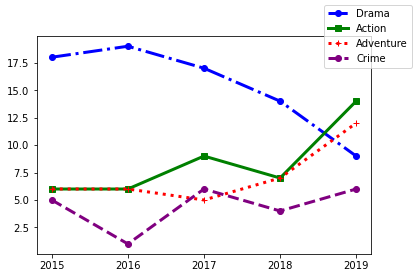

In [114]:
fig, ax = plt.subplots()
ax.plot(('2015','2016','2017','2018','2019'), drama_list , color="blue", lw=3, ls='-.', marker='o')
ax.plot(('2015','2016','2017','2018','2019'), action_list , color="green", lw=3, ls='-', marker='s')
ax.plot(('2015','2016','2017','2018','2019'), adventure_list , color="red", lw=3, ls=':', marker='+')
ax.plot(('2015','2016','2017','2018','2019'), crime_list , color="purple", lw=3, ls='--', marker='o');
fig.legend(labels=["Drama", "Action", "Adventure", "Crime"], loc = "upper right");

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# Here you run your code to model the data


**NOW I WANT TO START PLAYING WITH THE MOB DATABASE**

In [ ]:
bom_gross.head()

In [ ]:
bom_gross.info()

from here we can see that foreign_gross is an obj, not an int. To change the type to int, first we have to delete the NaN values from that columns.

In [ ]:
bom_gross.dropna(subset = ['foreign_gross'], inplace=True)

In [ ]:

# I am doing this step because i was having errors of not being able to convert into float 
bom_gross["foreign_gross"] = [float(str(i).replace(",", "")) for i in bom_gross["foreign_gross"]]


In [ ]:
bom_gross['foreign_gross'] = bom_gross['foreign_gross'].astype(float)

In [ ]:
#so far I don't want to delete columns, because maybe they have domestic gross but not foreign. So better to remove the column that total is n/v

In [ ]:
bom_gross.info()

In [ ]:
bom_gross['total_gross'] = bom_gross['foreign_gross'] + bom_gross['domestic_gross']

In [ ]:
bom_gross.head()

nicer to read

In [ ]:
bom_gross['nicer_gross'] = f"{bom_gross['foreign_gross']}"


In [ ]:
bom_gross.drop(['nicer_gross'], axis = 1, inplace=True)


In [ ]:
bom_gross.head()

In [ ]:
gross_top10 = bom_gross[bom_gross['year'] > 2017].sort_values('total_gross').tail(10)
gross_top10

In [ ]:

x = gross_top10['title']
y1 = gross_top10['domestic_gross']
y2 = gross_top10['foreign_gross']
  
# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.xticks(rotation=90)
plt.show()

In [ ]:
gross_top10

In [ ]:
rslt_df = bom_gross_raw[bom_gross_raw['title'] == 'Avengers: Infinity War']

In [ ]:
rslt_df

In [ ]:
that's a bit of a weird value....

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***